In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from numpy import abs, sqrt, sin, cos, arccos, arcsin, tan, arctan, sinh, cosh, tanh, arcsinh, arctanh, round, floor, \
    ceil, exp, log, pi
import sympy as sp

In [95]:
class Graph:
    def __init__(self, function, left_point, right_point):
        self.function = function
        self.left_point = left_point
        self.right_point = right_point
        self.string_to_float()
        self.trap_width = 0
        self.coordinates_x = []
        self.trapezoid_area = []
        self.simpson_area = []
        self.change_to_program_code()
        self.delta_x = 0
        self.function_values = []

    def create_points_array(self, n):
        delta_x = np.divide((self.right_point - self.left_point), n)
        self.delta_x = delta_x
        left, right = self.left_point, self.right_point
        while left <= right:
            self.coordinates_x.append(left)
            left += delta_x

    def compute_trapezoid_area(self):
        self.trapezoid_area = list(map(lambda x: 2 * self.get_length(x[1]) if (
                x[0] != 0 and x[0] != len(self.coordinates_x) - 1) else self.get_length(x[1]),
                                       enumerate(self.coordinates_x)))
        return self.trapezoid_area

    def compute_simpsons_area(self):
        self.simpson_area = list(map(lambda x: self.get_length(x[1]) * 2 if (
                x[0] % 2 == 0 and x[0] != 0 and x[0] != len(self.coordinates_x) - 1) else self.get_length(
            x[1]) * 4 if (
                x[0] % 2 == 1 and x[0] != 0 and x[0] != len(self.coordinates_x) - 1) else self.get_length(x[1]),
                                     enumerate(self.coordinates_x)))
        return self.simpson_area

    def __str__(self):
        return f'Your function: {self.function}'

    def new_condition(self):
        self.function_values = []

    def change_to_program_code(self, variable=None):
        if 'np.e' not in self.function:
            self.function = self.function.replace('e', 'np.e')
        if '^' in self.function:
            self.function = self.function.replace('^', ' ** ')
        if variable:
            variable = variable.replace('^', ' ** ')
            return variable

    def get_function_value(self, point_coordinate):
        x = point_coordinate
        try:
            new_value = eval(self.function)
            self.function_values.append([x, new_value])
            return new_value
        except ZeroDivisionError or RuntimeWarning:
            return

    def save_plot(self, x, y, filename,action='Save'):
        step = 0.001
        left, right = self.left_point, self.right_point
        while left <= right:
            left += step
            self.get_function_value(left)
        x, y = list(map(lambda k: k[0], self.function_values)), list(map(lambda k: k[1], self.function_values))
        plt.plot(x, y, label=self.function)
        plt.axhline(0, color='black', linewidth=1.2)
        plt.axvline(0, color='black', linewidth=1.2)
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.legend()
        if action == 'Save':
            plt.savefig(f'{filename}.jpg')
            plt.close()
        else:
            plt.show()

    def get_length(self, x):
        x = x
        try:
            return eval(self.function)
        except ZeroDivisionError or RuntimeWarning:
            return

    def draw_plot(self):
        self.new_condition()
        self.save_plot(x=[], y=[], filename='Function',action='Show')

    def compute_area(self, height, width):
        self.down_area.append(height * width)

    def draw_trap_plot(self, traps_count):
        self.new_condition()
        self.trap_width = np.divide((self.right_point - self.left_point), traps_count)
        k_traps = 0
        left_point = self.left_point
        trap_coordinates = []
        while k_traps < traps_count:
            if k_traps != traps_count:
                width = self.trap_width
                try:
                    left_height = self.get_length(x=left_point)
                    right_height = self.get_length(x=left_point + width)
                    x_coordinates = [left_point, left_point, left_point + width, left_point + width]
                    y_coordinates = [0, left_height, right_height, 0]
                    trap_coordinates.append(
                        patches.Polygon(list(zip(x_coordinates, y_coordinates)), edgecolor='red',
                                        facecolor='none',
                                        linewidth=2))
                except ZeroDivisionError or RuntimeWarning:
                    pass
            left_point += self.delta_x
            k_traps += 1

        fig, ax = plt.subplots()
        for i in trap_coordinates:
            ax.add_patch(i)
        self.save_plot(None,None,filename='Trapezoidal_area',action='Show')

    def string_to_float(self):
        self.left_point = self.change_to_program_code(variable=self.left_point)
        self.right_point = self.change_to_program_code(variable=self.right_point)
        if 'pi' in self.right_point:
            new_var = self.right_point.replace('pi', 'np.pi')
            self.right_point = eval(new_var, {"np": np})
        elif 'e' in self.right_point:
            new_var = self.right_point.replace('e', 'np.e')
            self.right_point = eval(new_var, {"np": np})
        if 'pi' in self.left_point:
            new_var = self.left_point.replace('pi', 'np.pi')
            self.left_point = eval(new_var, {"np": np})
        elif 'e' in self.left_point:
            new_var = self.left_point.replace('e', 'np.e')
            self.left_point = eval(new_var, {"np": np})
        self.right_point = float(self.right_point)
        self.left_point = float(self.left_point)

    def compute_simpsons_error(self, traps_count):
        borders = (self.right_point - self.left_point) ** 5
        denominator = 180 * (traps_count ** 4)
        find_max_ = list(enumerate(list(map(lambda x: self.get_length(x[1]), enumerate(self.coordinates_x)))))
        find_max = self.coordinates_x[max(find_max_, key=lambda x: x[1])[0]]
        x = sp.Symbol('x')
        my_function=self.function
        if 'np.e' in self.function:
            expr = sp.exp(x)
            my_function = expr.subs(sp.exp, sp.Float(sp.E))
        forth_der = sp.diff(my_function, x, 4)
        value = forth_der.subs(x, find_max)
        return (value * borders) / denominator

    def compute_trapezoid_error(self,traps_count):
        borders = (self.right_point - self.left_point) ** 3
        denominator = 12 * (traps_count ** 2)
        find_max_ = list(enumerate(list(map(lambda x: self.get_length(x[1]), enumerate(self.coordinates_x)))))
        find_max = self.coordinates_x[max(find_max_, key=lambda x: x[1])[0]]
        x = sp.Symbol('x')
        my_function=self.function
        if 'np.e' in self.function:
            expr = sp.exp(x)
            my_function = expr.subs(sp.exp, sp.Float(sp.E))
        second_der = sp.diff(my_function, x, 2)
        value = second_der.subs(x, find_max)
        return (value * borders) / denominator

Your function: sin(x)


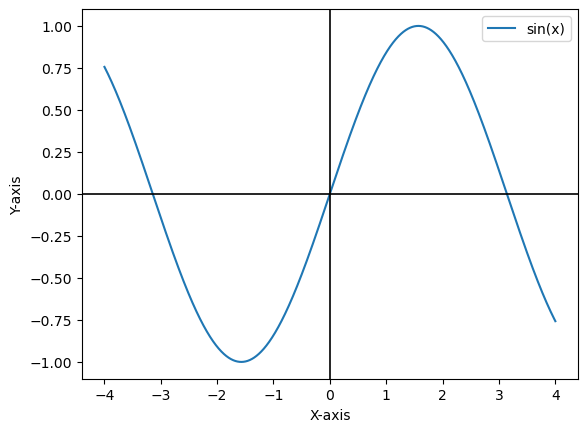

Trapezoidal area of the graph : 1.332267629550188e-16
Simpsons area of the graph : 1.4802973661668753e-16


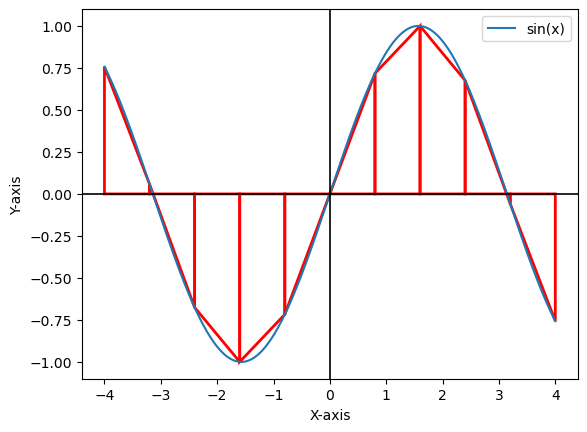

Trapezoidal estimated error = -0.426484737297709
Simpsons estimated error = 0.0181966821247022


In [96]:
# a = input('Enter your function : ')
# my function 
a = 'sin(x)'
# l = str(input("Left point of Domain : "))
# left point of domain 
l = '-4'
# r = str(input("Right point of Domain : "))
# right point of domain 
r = '4'

graph = Graph(a, l, r)
print(graph)
graph.draw_plot()
# traps_count = int(input('Enter the number of traps : '))
# number of trapezoids 
traps_count = 10
graph.create_points_array(traps_count)
print(f'Trapezoidal area of the graph : {(sum(graph.compute_trapezoid_area())) * (graph.delta_x / 2)}')
print(f'Simpsons area of the graph : {(sum(graph.compute_simpsons_area()) * (graph.delta_x / 3))}')
graph.draw_trap_plot(traps_count=traps_count)
error_T = graph.compute_trapezoid_error(traps_count)
print(f'Trapezoidal estimated error = {error_T}')
error_s = graph.compute_simpsons_error(traps_count)
print(f'Simpsons estimated error = {error_s}')

Your function: sin(x) ** 3*2


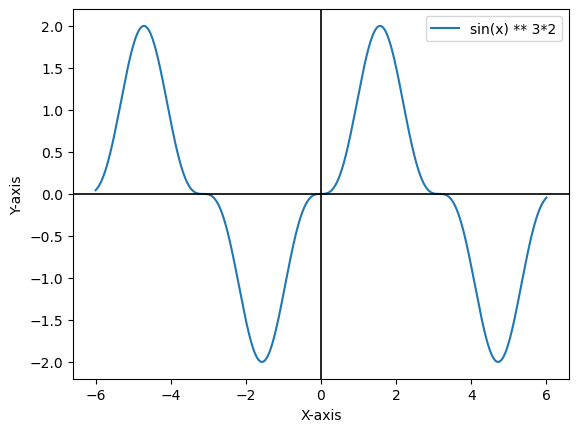

Trapezoidal area of the graph : 0.10934921278605486
Simpsons area of the graph : 0.20706385919543083


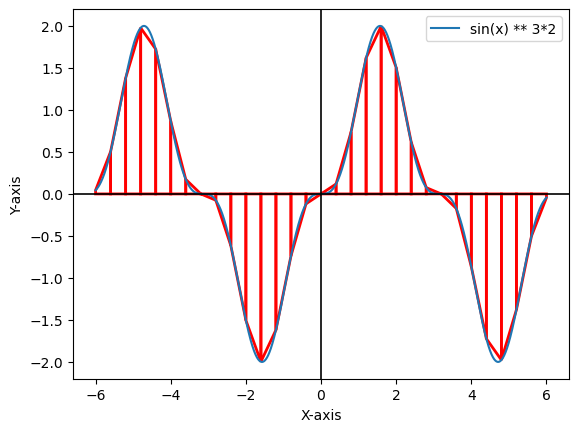

Trapezoidal estimated error = -0.957136183091766
Simpsons estimated error = 0.0714138061865195


In [97]:
# a = input('Enter your function : ')
# my function 
a = 'sin(x)^3*2'
# l = str(input("Left point of Domain : "))
# left point of domain 
l = '-6'
# r = str(input("Right point of Domain : "))
# right point of domain 
r = '6'

graph1 = Graph(a, l, r)
print(graph1)
graph1.draw_plot()
# traps_count = int(input('Enter the number of traps : '))
# number of trapezoids 
traps_count = 30
graph1.create_points_array(traps_count)
print(f'Trapezoidal area of the graph : {(sum(graph1.compute_trapezoid_area())) * (graph1.delta_x / 2)}')
print(f'Simpsons area of the graph : {(sum(graph1.compute_simpsons_area()) * (graph1.delta_x / 3))}')
graph1.draw_trap_plot(traps_count=traps_count)
error_T = graph1.compute_trapezoid_error(traps_count)
print(f'Trapezoidal estimated error = {error_T}')
error_s = graph1.compute_simpsons_error(traps_count)
print(f'Simpsons estimated error = {error_s}')

Your function: np.e ** x


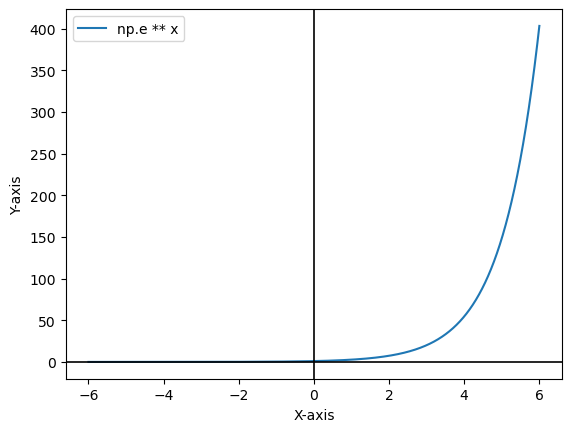

Trapezoidal area of the graph : 424.7163222617912
Simpsons area of the graph : 337.5730830944965


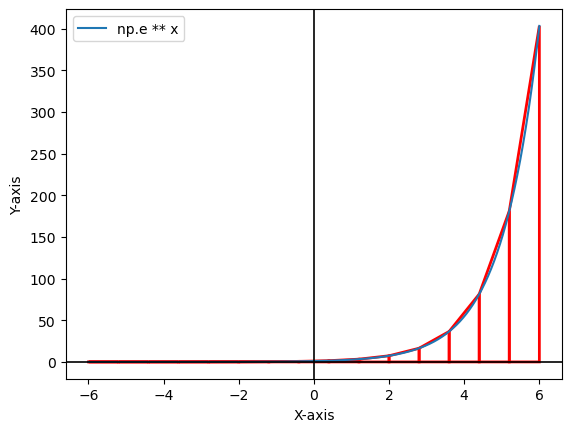

Trapezoidal estimated error = 258.194427835350
Simpsons estimated error = 11.0162955876416


In [98]:
# a = input('Enter your function : ')
# my function 
a = 'e^x'
# l = str(input("Left point of Domain : "))
# left point of domain 
l = '-6'
# r = str(input("Right point of Domain : "))
# right point of domain 
r = '6'

graph2 = Graph(a, l, r)
print(graph2)
graph2.draw_plot()
# traps_count = int(input('Enter the number of traps : '))
# number of trapezoids 
traps_count = 15
graph2.create_points_array(traps_count)
print(f'Trapezoidal area of the graph : {(sum(graph2.compute_trapezoid_area())) * (graph2.delta_x / 2)}')
print(f'Simpsons area of the graph : {(sum(graph2.compute_simpsons_area()) * (graph2.delta_x / 3))}')
graph2.draw_trap_plot(traps_count=traps_count)
error_T = graph2.compute_trapezoid_error(traps_count)
print(f'Trapezoidal estimated error = {error_T}')
error_s = graph2.compute_simpsons_error(traps_count)
print(f'Simpsons estimated error = {error_s}')

Your function: abs(cos(x) ** 2)


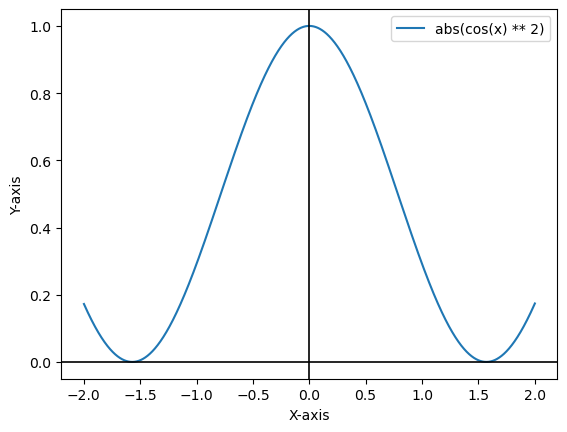

Trapezoidal area of the graph : 1.6306110755712397
Simpsons area of the graph : 1.6152174587207337


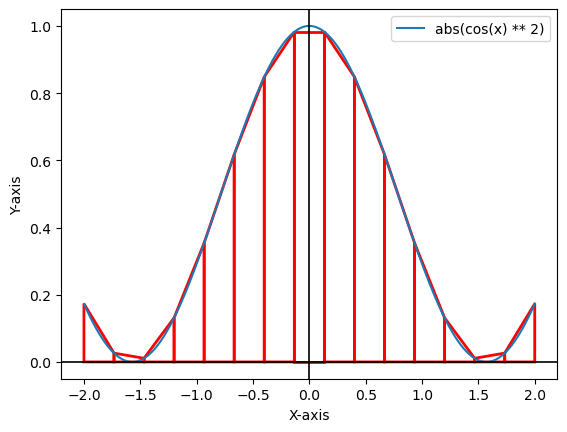

Trapezoidal estimated error = -0.0440561441403794*Subs(Derivative(re(x), x), x, 0.133333333333333)**2 - 0.00624633816043934*Subs(Derivative(re(x), x), x, 0.133333333333333)*Subs(Derivative(sign(cos(x)**2), x), x, 0.133333333333333) - 0.001675631633514*Subs(Derivative(re(x), x), x, 0.133333333333333) - 0.00624633816043934*Subs(Derivative(re(x), (x, 2)), x, 0.133333333333333) + 0.0474074074074074*Subs(Derivative(im(x), x), x, 0.133333333333333)**2
Simpsons estimated error = 0.00264843484528782*(1.92930929046113*Subs(Derivative(re(x), x), x, 0.133333333333333)*Subs(Derivative(im(x), x), x, 0.133333333333333) + 0.131758695571767*Subs(Derivative(im(x), (x, 2)), x, 0.133333333333333))*Subs(Derivative(re(x), x), x, 0.133333333333333)*Subs(Derivative(im(x), x), x, 0.133333333333333) + 9.70397744449364e-5*(1.92930929046113*Subs(Derivative(re(x), x), x, 0.133333333333333)*Subs(Derivative(im(x), x), x, 0.133333333333333) + 0.131758695571767*Subs(Derivative(im(x), (x, 2)), x, 0.133333333333333))*S

In [114]:
# a = input('Enter your function : ')
# my function 
a = 'abs(cos(x)^2)'
# l = str(input("Left point of Domain : "))
# left point of domain 
l = '-2'
# r = str(input("Right point of Domain : "))
# right point of domain 
r = '2'

graph3 = Graph(a, l, r)
print(graph3)
graph3.draw_plot()
# traps_count = int(input('Enter the number of traps : '))
# number of trapezoids 
traps_count = 15
graph3.create_points_array(traps_count)
print(f'Trapezoidal area of the graph : {(sum(graph3.compute_trapezoid_area())) * (graph3.delta_x / 2)}')
print(f'Simpsons area of the graph : {(sum(graph3.compute_simpsons_area()) * (graph3.delta_x / 3))}')
graph3.draw_trap_plot(traps_count=traps_count)
error_T = graph3.compute_trapezoid_error(traps_count)
print(f'Trapezoidal estimated error = {error_T}')
error_s = graph3.compute_simpsons_error(traps_count)
print(f'Simpsons estimated error = {error_s}')

Your function: arctan(x) ** 3


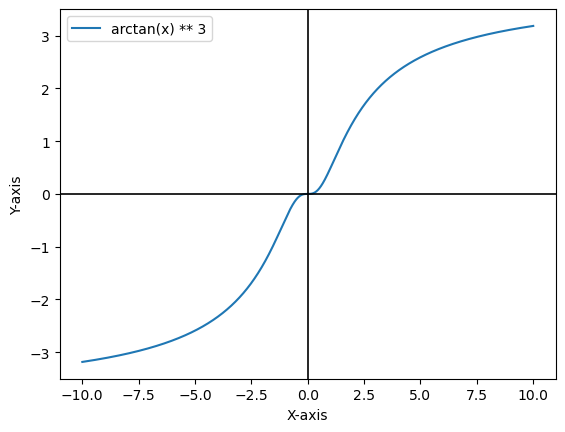

Trapezoidal area of the graph : 4.440892098500626e-16
Simpsons area of the graph : -1.4802973661668753e-15


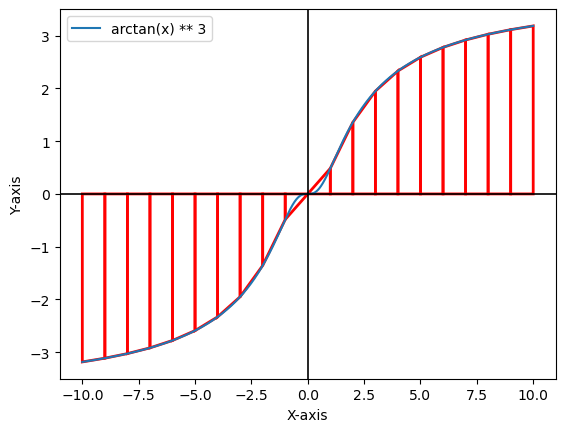

Trapezoidal estimated error = 5.0*(arctan(10.0)*Subs(Derivative(arctan(x), (x, 2)), x, 10.0) + 2*Subs(Derivative(arctan(x), x), x, 10.0)**2)*arctan(10.0)
Simpsons estimated error = 0.333333333333333*arctan(10.0)**2*Subs(Derivative(arctan(x), (x, 4)), x, 10.0) + 2.66666666666667*arctan(10.0)*Subs(Derivative(arctan(x), x), x, 10.0)*Subs(Derivative(arctan(x), (x, 3)), x, 10.0) + 2.0*arctan(10.0)*Subs(Derivative(arctan(x), (x, 2)), x, 10.0)**2 + 4.0*Subs(Derivative(arctan(x), x), x, 10.0)**2*Subs(Derivative(arctan(x), (x, 2)), x, 10.0)


In [110]:
# a = input('Enter your function : ')
# my function 
a = 'arctan(x)^3'
# l = str(input("Left point of Domain : "))
# left point of domain 
l = '-10'
# r = str(input("Right point of Domain : "))
# right point of domain 
r = '10'

graph4 = Graph(a, l, r)
print(graph4)
graph4.draw_plot()
# traps_count = int(input('Enter the number of traps : '))
# number of trapezoids 
traps_count = 20
graph4.create_points_array(traps_count)
print(f'Trapezoidal area of the graph : {(sum(graph4.compute_trapezoid_area())) * (graph4.delta_x / 2)}')
print(f'Simpsons area of the graph : {(sum(graph4.compute_simpsons_area()) * (graph4.delta_x / 3))}')
graph4.draw_trap_plot(traps_count=traps_count)
error_T = graph4.compute_trapezoid_error(traps_count)
print(f'Trapezoidal estimated error = {error_T}')
error_s = graph4.compute_simpsons_error(traps_count)
print(f'Simpsons estimated error = {error_s}')